# Pengenalan Project
Masih ingat dengan project Building Recommender System using Python?

Pada bagian sebelumnya kita telah melihat bagaimana recommender system dibuat hanya dengan menggunakan average rating, dengan mengurutkan score yang terdapat komponen average rating secara descending, kita dapat mengetahui (secara estimasi) film mana yang menurut para audience paling menarik.

Kali ini, kita akan membuat recommender system yang menggunakan Content/feature dari film/entitas tersebut, kemudian melakukan perhitungan terhadap kesamaannya satu dan yang lain sehingga ketika kita menunjuk ke satu film, kita akan mendapat beberapa film lain yang memiliki kesamaan dengan film tersebut. Hal ini biasa kita sebut sebagai Content Based Recommender System.

Dengan membandingkan kesamaan plot yang ada dan genre yang ada, ketika audience lebih menyukai film Narnia, maka content based recommender system ini akan juga merekomendasikan film seperti Harry Potter atau The Lords of The Rings yang memiliki genre yang mirip

# Import Basics Library and File Unloading
Langkah pertama yang harus kita lakukan adalah melakukan import library yang dibutuhkan untuk pengerjaan project ini dan melakukan pembacaan dataset.

Notes :

- Library yang akan kita gunakan adalah pandas (as pd) dan numpy (as np)
- Dataset yang akan digunakan adalah movie_rating_df.csv

Akses dataset :

- movie_rating_df.csv = https://storage.googleapis.com/dqlab-dataset/movie_rating_df.csv 

In [1]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np

#lakukan pembacaan dataset
movie_rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/movie_rating_df.csv ') 


# Menampilkan 5 data teratas dan info data

Setelah sebelumnya kita sudah menyimpan dataset pada variabel movie_rating_df, hal selanjutnya yang akan kita lakukan adalah menampilkan lima baris teratas dari dataset tersebut dan menampilkan info mengenai tipe data dan jumlah non-null value dari tiap kolom yang ada pada dataset. 

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/movie_rating_df.csv')

#tampilkan 5 baris teratas dari movive_rating_df
print(movie_rating_df.head())

#tampilkan info mengenai tipe data dari tiap kolom
print(movie_rating_df.info())

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult  startYear  endYear  runtimeMinutes                    genres  \
0        0     1894.0      NaN             1.0         Documentary,Short   
1        0     1892.0      NaN             5.0           Animation,Short   
2        0     1892.0      NaN             4.0  Animation,Comedy,Romance   
3        0     1892.0      NaN            12.0           Animation,Short   
4        0     1893.0      NaN             1.0              Comedy,Short   

   averageRating  numVotes  
0            5.6      1608  
1            6.0       197  
2          

# Add Actors Dataframe

Dari output yang sudah dihasilkan sebelumnya, kita dapat memperoleh list film dengan beberapa metadata seperti isAdult, runtimeMinutes, dan genres nya

Selanjutnya, kita akan menambahkan metadata lain seperti aktor/aktris yang bermain di film tersebut, kita akan menggunakan dataframe lain kemudian akan melakukan join dengan dataframe movie_rating_df. 

Dataset yang akan digunakan adalah actor_name.csv

Akses dataset: https://storage.googleapis.com/dqlab-dataset/actor_name.csv

# Add Directors and Writers Dataframe

Dataframe yang akan ditambahkan selanjutnya adalah dataframe yang berisi directors dan writers dari film.

Dataset yang akan digunakan adalah directors_writers.csv

Akses dataset : https://storage.googleapis.com/dqlab-dataset/directors_writers.csv

# Convert into List

Setelah menampilkan informasi mengenai dataframe directors_writer, dapat dilihat bahwa tidak ada nilai NULL pada dataset tersebut. Hal selanjutnya yang akan kita lakukan adalah mengubah director_name dan writer_name dari string menjadi list

Setelah itu, tampilkan 5 baris teratas dari dataframe director_writers

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

director_writers = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/directors_writers.csv')

#Mengubah director_name menjadi list
director_writers['director_name'] = director_writers['director_name'].apply(lambda row: row.split(','))
director_writers['writer_name'] = director_writers['writer_name'].apply(lambda row: row.split(','))

#Tampilkan 5 data teratas
print(director_writers.head())

      tconst                      director_name  \
0  tt0011414                   [David Kirkland]   
1  tt0011890                [Roy William Neill]   
2  tt0014341  [Buster Keaton, John G. Blystone]   
3  tt0018054                 [Cecil B. DeMille]   
4  tt0024151                      [James Cruze]   

                                         writer_name  
0                         [John Emerson, Anita Loos]  
1   [Arthur F. Goodrich, Burns Mantle, Mary Murillo]  
2  [Jean C. Havez, Clyde Bruckman, Joseph A. Mitc...  
3                                [Jeanie Macpherson]  
4               [Max Miller, Wells Root, Jack Jevne]  


# Update name_df

Kita hanya akan membutuhkan kolom nconst, primaryName, dan knownForTitles pada name_df untuk mencocokkan aktor/aktris ini dengan film yang ada. 

In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

name_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/actor_name.csv')
#Kita hanya akan membutuhkan kolom nconst, primaryName, dan knownForTitles
name_df = name_df[['nconst','primaryName','knownForTitles']]

#Tampilkan 5 baris teratas dari name_df
print(name_df.head())

       nconst          primaryName                           knownForTitles
0   nm1774132    Nathan McLaughlin  tt0417686,tt1713976,tt1891860,tt0454839
1  nm10683464        Bridge Andrew                                tt7718088
2   nm1021485    Brandon Fransvaag                                tt0168790
3   nm6940929   Erwin van der Lely                                tt4232168
4   nm5764974  Svetlana Shypitsyna                                tt3014168


# Movies per Actor

Hal selanjutnya yang ingin kita ketahui adalah mengenai variasi dari jumlah film yang dapat dibintangi oleh seorang aktor.

Tentunya seorang aktor dapat membintangi lebih dari 1 film, bukan? maka akan diperlukan untuk membuat table yang mempunyai relasi 1-1 ke masing-masing title movie tersebut. Kita akan melakukan unnest terhadap table tersebut. 

Pekerjaan selanjutnya yang harus kita lakukan adalah :

1. Melakukan pengecekan variasi jumlah film yang dibintangi oleh aktor.
2. Mengubah kolom 'knownForTitles' menjadi list of list.

In [5]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
name_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/actor_name.csv')
name_df = name_df[['nconst','primaryName','knownForTitles']]

#Melakukan pengecekan variasi
print(name_df['knownForTitles'].apply(lambda x: len(x.split(','))).unique())

#Mengubah knownForTitles menjadi list of list
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

#Mencetak 5 baris teratas
print(name_df.head())

[4 1 2 3]
       nconst          primaryName  \
0   nm1774132    Nathan McLaughlin   
1  nm10683464        Bridge Andrew   
2   nm1021485    Brandon Fransvaag   
3   nm6940929   Erwin van der Lely   
4   nm5764974  Svetlana Shypitsyna   

                                 knownForTitles  
0  [tt0417686, tt1713976, tt1891860, tt0454839]  
1                                   [tt7718088]  
2                                   [tt0168790]  
3                                   [tt4232168]  
4                                   [tt3014168]  


# Korespondensi 1 - 1

Karena pada data sebelumnya dapat dilihat bahwa seorang aktor dapat membintangi 1 sampai 4 film, diperlukan untuk membuat table yang mempunyai relasi 1-1 dari aktor ke masing-masing title movie tersebut. 

contoh table yang tidak korespondensi 1-1

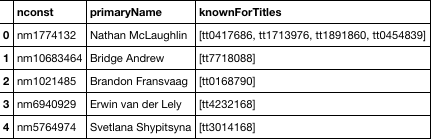

Contoh table korespondensi 1-1

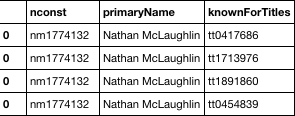

In [7]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

name_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/actor_name.csv')
name_df = name_df[['nconst','primaryName','knownForTitles']]
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

#menyiapkan bucket untuk dataframe
df_uni = []

for x in ['knownForTitles']:
    #mengulang index dari tiap baris sampai tiap elemen dari knownForTitles
    idx = name_df.index.repeat(name_df['knownForTitles'].str.len())
   
   #memecah values dari list di setiap baris dan menggabungkan nya dengan rows lain menjadi dataframe
    df1 = pd.DataFrame({
        x: np.concatenate(name_df[x].values)
    })
    
    #mengganti index dataframe tersebut dengan idx yang sudah kita define di awal
    df1.index = idx
    #untuk setiap dataframe yang terbentuk, kita append ke dataframe bucket
    df_uni.append(df1)
    
#menggabungkan semua dataframe menjadi satu
df_concat = pd.concat(df_uni, axis=1)

#left join dengan value dari dataframe yang awal
unnested_df = df_concat.join(name_df.drop(['knownForTitles'], axis=1), how='left')

#select kolom sesuai dengan dataframe awal
unnested_df = unnested_df[name_df.columns.tolist()]
print(unnested_df)

         nconst        primaryName knownForTitles
0     nm1774132  Nathan McLaughlin      tt0417686
0     nm1774132  Nathan McLaughlin      tt1713976
0     nm1774132  Nathan McLaughlin      tt1891860
0     nm1774132  Nathan McLaughlin      tt0454839
1    nm10683464      Bridge Andrew      tt7718088
..          ...                ...            ...
998   nm5245804      Eliza Jenkins      tt1464058
999   nm0948460         Greg Yolen      tt0436869
999   nm0948460         Greg Yolen      tt0476663
999   nm0948460         Greg Yolen      tt0109723
999   nm0948460         Greg Yolen      tt0364484

[1918 rows x 3 columns]


# Mengelompokkan primaryName menjadi list group by knownForTitles

Selanjutnya, kita akan melakukan grouping kembali pada kolom player karena yang kita inginkan adalah level movie untuk melakukan movie recommendation

In [9]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

name_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/actor_name.csv')
name_df = name_df[['nconst','primaryName','knownForTitles']]
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

df_uni = []
for x in ['knownForTitles']:
    idx = name_df.index.repeat(name_df['knownForTitles'].str.len())
    df1 = pd.DataFrame({
        x: np.concatenate(name_df[x].values)
    })
    df1.index = idx
    df_uni.append(df1)

df_concat = pd.concat(df_uni, axis=1)
unnested_df = df_concat.join(name_df.drop(['knownForTitles'], axis=1), how='left')
unnested_df = unnested_df[name_df.columns.tolist()]

unnested_drop = unnested_df.drop(['nconst'], axis=1)

#menyiapkan bucket untuk dataframe
df_uni = []
for col in ['primaryName']:
    #agregasi kolom PrimaryName sesuai group_col yang sudah di define di atas
    dfi = unnested_drop.groupby(['knownForTitles'])[col].apply(list)
    #Lakukan append
    df_uni.append(dfi)
df_grouped = pd.concat(df_uni, axis=1).reset_index()
df_grouped.columns = ['knownForTitles','cast_name']
print(df_grouped)

     knownForTitles           cast_name
0         tt0008125    [Charles Harley]
1         tt0009706    [Charles Harley]
2         tt0010304  [Natalie Talmadge]
3         tt0011414  [Natalie Talmadge]
4         tt0011890  [Natalie Talmadge]
...             ...                 ...
1893      tt9610496  [Stefano Baffetti]
1894      tt9714030        [Kevin Kain]
1895      tt9741820   [Caroline Plyler]
1896      tt9759814     [Ethan Francis]
1897      tt9856236     [Nuala Maguire]

[1898 rows x 2 columns]


# Join table

Sekarang kita akan melakukan :

join antara movie table dan cast table  ( field knownForTitles dan tconst)
join antara base_df dengan director_writer table (field tconst dan tconst)

In [11]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/movie_rating_df.csv')

director_writers = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/directors_writers.csv')
director_writers['director_name'] = director_writers['director_name'].apply(lambda row: row.split(','))
director_writers['writer_name'] = director_writers['writer_name'].apply(lambda row: row.split(','))

name_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/actor_name.csv')
name_df = name_df[['nconst','primaryName','knownForTitles']]
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

df_uni = []
for x in ['knownForTitles']:
    idx = name_df.index.repeat(name_df['knownForTitles'].str.len())
    df1 = pd.DataFrame({
        x: np.concatenate(name_df[x].values)
    })
    df1.index = idx
    df_uni.append(df1)

df_concat = pd.concat(df_uni, axis=1)
name_df.drop(['knownForTitles'], axis=1)
unnested_df = unnested_df[name_df.columns.tolist()]

unnested_drop = unnested_df.drop(['nconst'], axis=1)
df_uni = []
for col in ['primaryName']:
    dfi = unnested_drop.groupby(['knownForTitles'])[col].apply(list)
    df_uni.append(dfi)
df_grouped = pd.concat(df_uni, axis=1).reset_index()
df_grouped.columns = ['knownForTitles','cast_name']

#join antara movie table dan cast table 
base_df = pd.merge(df_grouped, movie_rating_df, left_on='knownForTitles', right_on='tconst', how='inner')

#join antara base_df dengan director_writer table
base_df = pd.merge(base_df, director_writers, left_on='tconst', right_on='tconst', how='left')
print(base_df.head())

  knownForTitles           cast_name     tconst titleType  \
0      tt0011414  [Natalie Talmadge]  tt0011414     movie   
1      tt0011890  [Natalie Talmadge]  tt0011890     movie   
2      tt0014341  [Natalie Talmadge]  tt0014341     movie   
3      tt0018054     [Reeka Roberts]  tt0018054     movie   
4      tt0024151     [James Hackett]  tt0024151     movie   

             primaryTitle           originalTitle  isAdult  startYear  \
0         The Love Expert         The Love Expert        0     1920.0   
1               Yes or No               Yes or No        0     1920.0   
2         Our Hospitality         Our Hospitality        0     1923.0   
3       The King of Kings       The King of Kings        0     1927.0   
4  I Cover the Waterfront  I Cover the Waterfront        0     1933.0   

   endYear  runtimeMinutes                   genres  averageRating  numVotes  \
0      NaN            60.0           Comedy,Romance            4.9       136   
1      NaN            72.0        

# Cleaning data

Setelah melakukan join table sebelumnya, sekarang hal yang akan kembali kita lakukan adalah melakukan cleaning pada data yang sudah dihasilkan. 

In [13]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/movie_rating_df.csv')

director_writers = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/directors_writers.csv')
director_writers['director_name'] = director_writers['director_name'].apply(lambda row: row.split(','))
director_writers['writer_name'] = director_writers['writer_name'].apply(lambda row: row.split(','))

name_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/actor_name.csv')
name_df = name_df[['nconst','primaryName','knownForTitles']]
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

df_uni = []
for x in ['knownForTitles']:
    idx = name_df.index.repeat(name_df['knownForTitles'].str.len())
    df1 = pd.DataFrame({
        x: np.concatenate(name_df[x].values)
    })
    df1.index = idx
    df_uni.append(df1)

df_concat = pd.concat(df_uni, axis=1)
unnested_df = df_concat.join(name_df.drop(['knownForTitles'], axis=1), how='left')
unnested_df = unnested_df[name_df.columns.tolist()]

unnested_drop = unnested_df.drop(['nconst'], axis=1)
df_uni = []
for col in ['primaryName']:
    dfi = unnested_drop.groupby(['knownForTitles'])[col].apply(list)
    df_uni.append(dfi)
df_grouped = pd.concat(df_uni, axis=1).reset_index()
df_grouped.columns = ['knownForTitles','cast_name']

base_df = pd.merge(df_grouped, movie_rating_df, left_on='knownForTitles', right_on='tconst', how='inner')
base_df = pd.merge(base_df, director_writers, left_on='tconst', right_on='tconst', how='left')

#Melakukan drop terhadap kolom knownForTitles
base_drop = base_df.drop(['knownForTitles'], axis=1)
print(base_drop.info())

#Mengganti nilai NULL pada kolom genres dengan 'Unknown'
base_drop['genres'] = base_drop['genres'].fillna('Unknown')

#Melakukan perhitungan jumlah nilai NULL pada tiap kolom
print(base_drop.isnull().sum())

#Mengganti nilai NULL pada kolom dorector_name dan writer_name dengan 'Unknown'
base_drop[['director_name','writer_name']] = base_drop[['director_name','writer_name']].fillna('unknown')

#karena value kolom genres terdapat multiple values, jadi kita akan bungkus menjadi list of list
base_drop['genres'] = base_drop['genres'].apply(lambda x: x.split(','))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cast_name       1060 non-null   object 
 1   tconst          1060 non-null   object 
 2   titleType       1060 non-null   object 
 3   primaryTitle    1060 non-null   object 
 4   originalTitle   1060 non-null   object 
 5   isAdult         1060 non-null   int64  
 6   startYear       1060 non-null   float64
 7   endYear         110 non-null    float64
 8   runtimeMinutes  1060 non-null   float64
 9   genres          745 non-null    object 
 10  averageRating   1060 non-null   float64
 11  numVotes        1060 non-null   int64  
 12  director_name   986 non-null    object 
 13  writer_name     986 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 116.1+ KB
None
cast_name           0
tconst              0
titleType           0
primaryTitle        0
originalTitle   

# Reformat table base_df

Hal selanjutnya yang akan kita lakukan adalah melakukan reformat pada table base_df yang beberapa kolomnya sudah didrop.

Petunjuk: 

Rename-lah kolom berikut:

primaryTitle -> title
- titleType -> type
- startYear -> start
- runtimeMinutes -> duration
- averageRating -> rating
- numVotes -> votes

In [21]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/movie_rating_df.csv')

director_writers = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/directors_writers.csv')
director_writers['director_name'] = director_writers['director_name'].apply(lambda row: row.split(','))
director_writers['writer_name'] = director_writers['writer_name'].apply(lambda row: row.split(','))

name_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/actor_name.csv')
name_df = name_df[['nconst','primaryName','knownForTitles']]
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

df_uni = []
for x in ['knownForTitles']:
    idx = name_df.index.repeat(name_df['knownForTitles'].str.len())
    df1 = pd.DataFrame({
        x: np.concatenate(name_df[x].values)
    })
    df1.index = idx
    df_uni.append(df1)

df_concat = pd.concat(df_uni, axis=1)
unnested_df = df_concat.join(name_df.drop(['knownForTitles'], axis=1), how='left')
unnested_df = unnested_df[name_df.columns.tolist()]

unnested_drop = unnested_df.drop(['nconst'], axis=1)
df_uni = []
for col in ['primaryName']:
    dfi = unnested_drop.groupby(['knownForTitles'])[col].apply(list)
    df_uni.append(dfi)
df_grouped = pd.concat(df_uni, axis=1).reset_index()
df_grouped.columns = ['knownForTitles','cast_name']

base_df = pd.merge(df_grouped, movie_rating_df, left_on='knownForTitles', right_on='tconst', how='inner')
base_df = pd.merge(base_df, director_writers, left_on='tconst', right_on='tconst', how='left')

base_drop = base_df.drop(['knownForTitles'], axis=1)
base_drop['genres'] = base_drop['genres'].fillna('Unknown')
base_drop[['director_name','writer_name']] = base_drop[['director_name','writer_name']].fillna('unknown')
base_drop['genres'] = base_drop['genres'].apply(lambda x: x.split(','))

#Drop kolom tconst, isAdult, endYear, originalTitle
base_drop2 = base_drop.drop(['tconst','isAdult','endYear','originalTitle'], axis=1)

base_drop2 = base_drop2[['primaryTitle','titleType','startYear','runtimeMinutes','genres','averageRating','numVotes','cast_name','director_name','writer_name']]

# Gunakan petunjuk!
base_drop2.columns = ['title','type','start','duration','genres','rating','votes','cast_name','director_name','writer_name']
print(base_drop2.head())

                    title   type   start  duration  \
0         The Love Expert  movie  1920.0      60.0   
1               Yes or No  movie  1920.0      72.0   
2         Our Hospitality  movie  1923.0      65.0   
3       The King of Kings  movie  1927.0     155.0   
4  I Cover the Waterfront  movie  1933.0      80.0   

                        genres  rating  votes           cast_name  \
0            [Comedy, Romance]     4.9    136  [Natalie Talmadge]   
1                    [Unknown]     6.3      7  [Natalie Talmadge]   
2  [Comedy, Romance, Thriller]     7.8   9621  [Natalie Talmadge]   
3  [Biography, Drama, History]     7.3   1826     [Reeka Roberts]   
4             [Drama, Romance]     6.3    455     [James Hackett]   

                       director_name  \
0                   [David Kirkland]   
1                [Roy William Neill]   
2  [Buster Keaton, John G. Blystone]   
3                 [Cecil B. DeMille]   
4                      [James Cruze]   

                   

# Klasifikasi Metadata

kita akan klasifikasikan berdasarkan metadata genres, primaryName (cast name), director name, dan writer_name

In [17]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/movie_rating_df.csv')

director_writers = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/directors_writers.csv')
director_writers['director_name'] = director_writers['director_name'].apply(lambda row: row.split(','))
director_writers['writer_name'] = director_writers['writer_name'].apply(lambda row: row.split(','))

name_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/actor_name.csv')
name_df = name_df[['nconst','primaryName','knownForTitles']]
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

df_uni = []
for x in ['knownForTitles']:
    idx = name_df.index.repeat(name_df['knownForTitles'].str.len())
    df1 = pd.DataFrame({
        x: np.concatenate(name_df[x].values)
    })
    df1.index = idx
    df_uni.append(df1)

df_concat = pd.concat(df_uni, axis=1)
unnested_df = df_concat.join(name_df.drop(['knownForTitles'], axis=1), how='left')
unnested_df = unnested_df[name_df.columns.tolist()]

unnested_drop = unnested_df.drop(['nconst'], axis=1)
df_uni = []
for col in ['primaryName']:
    dfi = unnested_drop.groupby(['knownForTitles'])[col].apply(list)
    df_uni.append(dfi)
df_grouped = pd.concat(df_uni, axis=1).reset_index()
df_grouped.columns = ['knownForTitles','cast_name']

base_df = pd.merge(df_grouped, movie_rating_df, left_on='knownForTitles', right_on='tconst', how='inner')
base_df = pd.merge(base_df, director_writers, left_on='tconst', right_on='tconst', how='left')

base_drop = base_df.drop(['knownForTitles'], axis=1)
base_drop['genres'] = base_drop['genres'].fillna('Unknown')
base_drop[['director_name','writer_name']] = base_drop[['director_name','writer_name']].fillna('unknown')
base_drop['genres'] = base_drop['genres'].apply(lambda x: x.split(','))

base_drop2 = base_drop.drop(['tconst','isAdult','endYear','originalTitle'], axis=1)
base_drop2 = base_drop2[['primaryTitle','titleType','startYear','runtimeMinutes','genres','averageRating','numVotes','cast_name','director_name','writer_name']]
base_drop2.columns = ['title','type','start','duration','genres','rating','votes','cast_name','director_name','writer_name']

#Klasifikasi berdasar title, cast_name, genres, director_name, dan writer_name
feature_df = base_drop2[['title','cast_name','genres','director_name','writer_name']]

#Tampilkan 5 baris teratas
print(feature_df.head())

                    title           cast_name                       genres  \
0         The Love Expert  [Natalie Talmadge]            [Comedy, Romance]   
1               Yes or No  [Natalie Talmadge]                    [Unknown]   
2         Our Hospitality  [Natalie Talmadge]  [Comedy, Romance, Thriller]   
3       The King of Kings     [Reeka Roberts]  [Biography, Drama, History]   
4  I Cover the Waterfront     [James Hackett]             [Drama, Romance]   

                       director_name  \
0                   [David Kirkland]   
1                [Roy William Neill]   
2  [Buster Keaton, John G. Blystone]   
3                 [Cecil B. DeMille]   
4                      [James Cruze]   

                                         writer_name  
0                         [John Emerson, Anita Loos]  
1   [Arthur F. Goodrich, Burns Mantle, Mary Murillo]  
2  [Jean C. Havez, Clyde Bruckman, Joseph A. Mitc...  
3                                [Jeanie Macpherson]  
4              

# Pertanyaan 1: Bagaimana cara membuat fungsi untuk strip spaces dari setiap row dan setiap elemennya?

Lengkapilah function sanitize yang digunakan untuk melakukan strip spaces dari setiap row dan setiap elemennya

In [26]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/movie_rating_df.csv')

director_writers = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/directors_writers.csv')
director_writers['director_name'] = director_writers['director_name'].apply(lambda row: row.split(','))
director_writers['writer_name'] = director_writers['writer_name'].apply(lambda row: row.split(','))

name_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/actor_name.csv')
name_df = name_df[['nconst','primaryName','knownForTitles']]
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

df_uni = []
for x in ['knownForTitles']:
    idx = name_df.index.repeat(name_df['knownForTitles'].str.len())
    df1 = pd.DataFrame({
        x: np.concatenate(name_df[x].values)
    })
    df1.index = idx
    df_uni.append(df1)

df_concat = pd.concat(df_uni, axis=1)
unnested_df = df_concat.join(name_df.drop(['knownForTitles'], axis=1), how='left')
unnested_df = unnested_df[name_df.columns.tolist()]

unnested_drop = unnested_df.drop(['nconst'], axis=1)
df_uni = []
for col in ['primaryName']:
    dfi = unnested_drop.groupby(['knownForTitles'])[col].apply(list)
    df_uni.append(dfi)
df_grouped = pd.concat(df_uni, axis=1).reset_index()
df_grouped.columns = ['knownForTitles','cast_name']

base_df = pd.merge(df_grouped, movie_rating_df, left_on='knownForTitles', right_on='tconst', how='inner')
base_df = pd.merge(base_df, director_writers, left_on='tconst', right_on='tconst', how='left')

base_drop = base_df.drop(['knownForTitles'], axis=1)
base_drop['genres'] = base_drop['genres'].fillna('Unknown')
base_drop[['director_name','writer_name']] = base_drop[['director_name','writer_name']].fillna('unknown')
base_drop['genres'] = base_drop['genres'].apply(lambda x: x.split(','))

base_drop2 = base_drop.drop(['tconst','isAdult','endYear','originalTitle'], axis=1)
base_drop2 = base_drop2[['primaryTitle','titleType','startYear','runtimeMinutes','genres','averageRating','numVotes','cast_name','director_name','writer_name']]
base_drop2.columns = ['title','type','start','duration','genres','rating','votes','cast_name','director_name','writer_name']

feature_df = base_drop2[['title','cast_name','genres','director_name','writer_name']]

def sanitize(x):
    try:
        #kalau cell berisi list
        if isinstance(x,list):
            return [i.replace(' ','').lower() for i in x]
        #kalau cell berisi string
        else:
            return [x.replace(' ','').lower()]
    except:
        print(x)
        
#Kolom : cast_name, genres, writer_name, director_name        
feature_cols = ['cast_name','genres','writer_name','director_name']

#Apply function sanitize 
for col in feature_cols:
    feature_df[col] = feature_df[col].apply(sanitize)

C:\Users\hp\AppData\Local\Temp\ipykernel_25916\1566009071.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df[col] = feature_df[col].apply(sanitize)


# Pertanyaan 2: Bagaimana cara membuat fungsi untuk membuat metadata soup (menggabungkan semua feature menjadi 1 bagian kalimat) untuk setiap judulnya?

Lengkapi function soup_feature yang digunakan untuk menggabungkan semua feature  menjadi 1 bagian 

In [23]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/movie_rating_df.csv')

director_writers = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/directors_writers.csv')
director_writers['director_name'] = director_writers['director_name'].apply(lambda row: row.split(','))
director_writers['writer_name'] = director_writers['writer_name'].apply(lambda row: row.split(','))

name_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/actor_name.csv')
name_df = name_df[['nconst','primaryName','knownForTitles']]
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

df_uni = []
for x in ['knownForTitles']:
    idx = name_df.index.repeat(name_df['knownForTitles'].str.len())
    df1 = pd.DataFrame({
        x: np.concatenate(name_df[x].values)
    })
    df1.index = idx
    df_uni.append(df1)

df_concat = pd.concat(df_uni, axis=1)
unnested_df = df_concat.join(name_df.drop(['knownForTitles'], axis=1), how='left')
unnested_df = unnested_df[name_df.columns.tolist()]

unnested_drop = unnested_df.drop(['nconst'], axis=1)
df_uni = []
for col in ['primaryName']:
    dfi = unnested_drop.groupby(['knownForTitles'])[col].apply(list)
    df_uni.append(dfi)
df_grouped = pd.concat(df_uni, axis=1).reset_index()
df_grouped.columns = ['knownForTitles','cast_name']

base_df = pd.merge(df_grouped, movie_rating_df, left_on='knownForTitles', right_on='tconst', how='inner')
base_df = pd.merge(base_df, director_writers, left_on='tconst', right_on='tconst', how='left')

base_drop = base_df.drop(['knownForTitles'], axis=1)
base_drop['genres'] = base_drop['genres'].fillna('Unknown')
base_drop[['director_name','writer_name']] = base_drop[['director_name','writer_name']].fillna('unknown')
base_drop['genres'] = base_drop['genres'].apply(lambda x: x.split(','))

base_drop2 = base_drop.drop(['tconst','isAdult','endYear','originalTitle'], axis=1)
base_drop2 = base_drop2[['primaryTitle','titleType','startYear','runtimeMinutes','genres','averageRating','numVotes','cast_name','director_name','writer_name']]
base_drop2.columns = ['title','type','start','duration','genres','rating','votes','cast_name','director_name','writer_name']

feature_df = base_drop2[['title','cast_name','genres','director_name','writer_name']]

def sanitize(x):
    try:
        if isinstance(x, list):
            return [i.replace(' ','').lower() for i in x]
        else:
            return [x.replace(' ','').lower()]
    except:
        print(x)
feature_cols = ['cast_name','genres','writer_name','director_name']

for col in feature_cols:
    feature_df[col] = feature_df[col].apply(sanitize)

#kolom yang digunakan : cast_name, genres, director_name, writer_name
def soup_feature(x):
    return ' '.join(x['cast_name']) + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['director_name']) + ' ' + ' '.join(x['writer_name'])

#membuat soup menjadi 1 kolom 
feature_df['soup'] = feature_df.apply(soup_feature, axis=1)
    
    

C:\Users\hp\AppData\Local\Temp\ipykernel_25916\1030913282.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df[col] = feature_df[col].apply(sanitize)
C:\Users\hp\AppData\Local\Temp\ipykernel_25916\1030913282.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['soup'] = feature_df.apply(soup_feature, axis=1)


# Pertanyaan 3: Cara menyiapkan CountVectorizer (stop_words = english) dan fit dengan soup yang kita buat di atas

CountVectorizer adalah tipe paling sederhana dari vectorizer. Supaya lebih mudah akan dijelaskan melalui contoh di bawah ini:

bayangkan terdapat 3 text A, B, dan C, dimana text nya adalah

- A: The Sun is a star
- B: My Love is like a red, red rose
- C: Mary had a little lamb

Sekarang kita harus konversi text-text ini menjadi bentuk vector menggunakan CountVectorizer. Langkah-langkahnya adalah: menghitung ukuran dari vocabulary. Vocabulary adalah jumlah dari kata unik yang ada dari text tersebut.


Oleh sebab itu, vocabulary dari set ketiga text tersebut adalah: the, sun, is, a, star, my, love, like, red, rose, mary, had, little, lamb. Secara total, ukuran vocabulary adalah 14.


Tetapi, biasanya kita tidak include stop words (english), seperti as, is, a, the, dan sebagainya karena itu adalah kata yang sudah common sekali.


Dengan mengeliminasi stop words, maka clean size vocabulary kita adalah like, little, lamb, love, mary, red, rose, sun, star (sorted alphabet ascending)
Maka, dengan menggunakan CountVectorizer, maka hasil yang kita dapatkan adalah sebagai berikut:


- A : (0,0,0,0,0,0,0,1,1), terdiri atas sun:1, star:1
- B : (1,0,0,1,0,2,1,0,0), terdiri atas like:1, love:1, red:2, rose:1
- C : (0,1,1,0,1,0,0,0,0), terdiri atas little:1, lamb:1, mary:1

In [27]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/movie_rating_df.csv')

director_writers = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/directors_writers.csv')
director_writers['director_name'] = director_writers['director_name'].apply(lambda row: row.split(','))
director_writers['writer_name'] = director_writers['writer_name'].apply(lambda row: row.split(','))

name_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/actor_name.csv')
name_df = name_df[['nconst','primaryName','knownForTitles']]
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

df_uni = []
for x in ['knownForTitles']:
    idx = name_df.index.repeat(name_df['knownForTitles'].str.len())
    df1 = pd.DataFrame({
        x: np.concatenate(name_df[x].values)
    })
    df1.index = idx
    df_uni.append(df1)

df_concat = pd.concat(df_uni, axis=1)
unnested_df = df_concat.join(name_df.drop(['knownForTitles'], axis=1), how='left')
unnested_df = unnested_df[name_df.columns.tolist()]

unnested_drop = unnested_df.drop(['nconst'], axis=1)
df_uni = []
for col in ['primaryName']:
    dfi = unnested_drop.groupby(['knownForTitles'])[col].apply(list)
    df_uni.append(dfi)
df_grouped = pd.concat(df_uni, axis=1).reset_index()
df_grouped.columns = ['knownForTitles','cast_name']

base_df = pd.merge(df_grouped, movie_rating_df, left_on='knownForTitles', right_on='tconst', how='inner')
base_df = pd.merge(base_df, director_writers, left_on='tconst', right_on='tconst', how='left')

base_drop = base_df.drop(['knownForTitles'], axis=1)
base_drop['genres'] = base_drop['genres'].fillna('Unknown')
base_drop[['director_name','writer_name']] = base_drop[['director_name','writer_name']].fillna('unknown')
base_drop['genres'] = base_drop['genres'].apply(lambda x: x.split(','))

base_drop2 = base_drop.drop(['tconst','isAdult','endYear','originalTitle'], axis=1)
base_drop2 = base_drop2[['primaryTitle','titleType','startYear','runtimeMinutes','genres','averageRating','numVotes','cast_name','director_name','writer_name']]
base_drop2.columns = ['title','type','start','duration','genres','rating','votes','cast_name','director_name','writer_name']

feature_df = base_drop2[['title','cast_name','genres','director_name','writer_name']]

def sanitize(x):
    try:
        if isinstance(x, list):
            return [i.replace(' ','').lower() for i in x]
        else:
            return [x.replace(' ','').lower()]
    except:
        print(x)
feature_cols = ['cast_name','genres','writer_name','director_name']

for col in feature_cols:
    feature_df[col] = feature_df[col].apply(sanitize)

def soup_feature(x):
    return ' '.join(x['cast_name']) + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['director_name']) + ' ' + ' '.join(x['writer_name'])

feature_df['soup'] = feature_df.apply(soup_feature, axis=1)

#import CountVectorizer 
from sklearn.feature_extraction.text import CountVectorizer

#definisikan CountVectorizer dan mengubah soup tadi menjadi bentuk vector
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(feature_df['soup'])

print(count)
print(count_matrix.shape)

C:\Users\hp\AppData\Local\Temp\ipykernel_25916\3942273324.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df[col] = feature_df[col].apply(sanitize)
C:\Users\hp\AppData\Local\Temp\ipykernel_25916\3942273324.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['soup'] = feature_df.apply(soup_feature, axis=1)


CountVectorizer(stop_words='english')
(1060, 10026)


# Pertanyaan 4: Cara membuat model similarity antara count matrix

Pada langkah ini, kita akan menghitung score cosine similarity dari setiap pasangan judul (berdasarkan semua kombinasi pasangan yang ada, dengan kata lain kita akan membuat 675 x 675 matrix, dimana cell di kolom i dan j menunjukkan score similarity antara judul i dan j. kita dapat dengan mudah melihat bahwa matrix ini simetris dan setiap elemen pada diagonal adalah 1, karena itu adalah similarity score dengan dirinya sendiri

Cosine Similarity
pada bagian ini, kita akan menggunakan formula cosine similarity untuk membuat model. Score cosine ini sangatlah berguna dan mudah untuk dihitung.

formula untuk perhitungan cosine similarity antara 2 text, adalah sebagai berikut:

### 📐 Cosine Similarity Formula

Cosine similarity digunakan untuk mengukur kemiripan antara dua vektor (misalnya, representasi dari dua teks). Rumus matematisnya adalah:

\[
\text{cosine\_similarity}(A, B) = \frac{A \cdot B}{\|A\| \times \|B\|}
\]

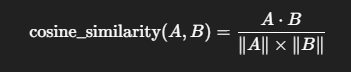

Dimana:

- \( A \cdot B \) adalah dot product (perkalian titik) antara vektor A dan B.
- \( \|A\| \) adalah norma (panjang) dari vektor A.
- \( \|B\| \) adalah norma (panjang) dari vektor B.

Nilai cosine similarity berada dalam rentang **0 sampai 1**, di mana:
- **1** berarti kedua teks sangat mirip (arah vektornya sama).
- **0** berarti tidak ada kemiripan sama sekali (arah vektornya tegak lurus).


output yang didapat antara range -1 sampai 1. Score yang hampir mencapai 1 artinya kedua entitas tersebut sangatlah mirip sedangkan score yang hampir mencapai -1 artinya kedua entitas tersebut adalah beda

In [29]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/movie_rating_df.csv')

director_writers = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/directors_writers.csv')
director_writers['director_name'] = director_writers['director_name'].apply(lambda row: row.split(','))
director_writers['writer_name'] = director_writers['writer_name'].apply(lambda row: row.split(','))

name_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/actor_name.csv')
name_df = name_df[['nconst','primaryName','knownForTitles']]
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

df_uni = []
for x in ['knownForTitles']:
    idx = name_df.index.repeat(name_df['knownForTitles'].str.len())
    df1 = pd.DataFrame({
        x: np.concatenate(name_df[x].values)
    })
    df1.index = idx
    df_uni.append(df1)

df_concat = pd.concat(df_uni, axis=1)
unnested_df = df_concat.join(name_df.drop(['knownForTitles'], axis=1), how='left')
unnested_df = unnested_df[name_df.columns.tolist()]

unnested_drop = unnested_df.drop(['nconst'], axis=1)
df_uni = []
for col in ['primaryName']:
    dfi = unnested_drop.groupby(['knownForTitles'])[col].apply(list)
    df_uni.append(dfi)
df_grouped = pd.concat(df_uni, axis=1).reset_index()
df_grouped.columns = ['knownForTitles','cast_name']

base_df = pd.merge(df_grouped, movie_rating_df, left_on='knownForTitles', right_on='tconst', how='inner')
base_df = pd.merge(base_df, director_writers, left_on='tconst', right_on='tconst', how='left')

base_drop = base_df.drop(['knownForTitles'], axis=1)
base_drop['genres'] = base_drop['genres'].fillna('Unknown')
base_drop[['director_name','writer_name']] = base_drop[['director_name','writer_name']].fillna('unknown')
base_drop['genres'] = base_drop['genres'].apply(lambda x: x.split(','))

base_drop2 = base_drop.drop(['tconst','isAdult','endYear','originalTitle'], axis=1)
base_drop2 = base_drop2[['primaryTitle','titleType','startYear','runtimeMinutes','genres','averageRating','numVotes','cast_name','director_name','writer_name']]
base_drop2.columns = ['title','type','start','duration','genres','rating','votes','cast_name','director_name','writer_name']

feature_df = base_drop2[['title','cast_name','genres','director_name','writer_name']]

def sanitize(x):
    try:
        if isinstance(x, list):
            return [i.replace(' ','').lower() for i in x]
        else:
            return [x.replace(' ','').lower()]
    except:
        print(x)
feature_cols = ['cast_name','genres','writer_name','director_name']

for col in feature_cols:
    feature_df[col] = feature_df[col].apply(sanitize)

def soup_feature(x):
    return ' '.join(x['cast_name']) + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['director_name']) + ' ' + ' '.join(x['writer_name'])

feature_df['soup'] = feature_df.apply(soup_feature, axis=1)

from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(feature_df['soup'])

#Import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

#Gunakan cosine_similarity antara count_matrix 
cosine_sim = cosine_similarity(count_matrix, count_matrix)

#print hasilnya
print(cosine_sim)

C:\Users\hp\AppData\Local\Temp\ipykernel_25916\3270593978.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df[col] = feature_df[col].apply(sanitize)
C:\Users\hp\AppData\Local\Temp\ipykernel_25916\3270593978.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['soup'] = feature_df.apply(soup_feature, axis=1)


[[1.         0.15430335 0.35355339 ... 0.         0.         0.13608276]
 [0.15430335 1.         0.10910895 ... 0.         0.         0.        ]
 [0.35355339 0.10910895 1.         ... 0.         0.08703883 0.09622504]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.08703883 ... 0.         1.         0.10050378]
 [0.13608276 0.         0.09622504 ... 0.         0.10050378 1.        ]]


# Pertanyaan 5: Cara membuat content based recommender system

Task selanjutnya yang harus dilakukan adalah reverse mapping dengan judul sebagai index nya

In [31]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

movie_rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/movie_rating_df.csv')

director_writers = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/directors_writers.csv')
director_writers['director_name'] = director_writers['director_name'].apply(lambda row: row.split(','))
director_writers['writer_name'] = director_writers['writer_name'].apply(lambda row: row.split(','))

name_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/actor_name.csv')
name_df = name_df[['nconst','primaryName','knownForTitles']]
name_df['knownForTitles'] = name_df['knownForTitles'].apply(lambda x: x.split(','))

df_uni = []
for x in ['knownForTitles']:
    idx = name_df.index.repeat(name_df['knownForTitles'].str.len())
    df1 = pd.DataFrame({
        x: np.concatenate(name_df[x].values)
    })
    df1.index = idx
    df_uni.append(df1)

df_concat = pd.concat(df_uni, axis=1)
unnested_df = df_concat.join(name_df.drop(['knownForTitles'], axis=1), how='left')
unnested_df = unnested_df[name_df.columns.tolist()]

unnested_drop = unnested_df.drop(['nconst'], axis=1)
df_uni = []
for col in ['primaryName']:
    dfi = unnested_drop.groupby(['knownForTitles'])[col].apply(list)
    df_uni.append(dfi)
df_grouped = pd.concat(df_uni, axis=1).reset_index()
df_grouped.columns = ['knownForTitles','cast_name']

base_df = pd.merge(df_grouped, movie_rating_df, left_on='knownForTitles', right_on='tconst', how='inner')
base_df = pd.merge(base_df, director_writers, left_on='tconst', right_on='tconst', how='left')

base_drop = base_df.drop(['knownForTitles'], axis=1)
base_drop['genres'] = base_drop['genres'].fillna('Unknown')
base_drop[['director_name','writer_name']] = base_drop[['director_name','writer_name']].fillna('unknown')
base_drop['genres'] = base_drop['genres'].apply(lambda x: x.split(','))

base_drop2 = base_drop.drop(['tconst','isAdult','endYear','originalTitle'], axis=1)
base_drop2 = base_drop2[['primaryTitle','titleType','startYear','runtimeMinutes','genres','averageRating','numVotes','cast_name','director_name','writer_name']]
base_drop2.columns = ['title','type','start','duration','genres','rating','votes','cast_name','director_name','writer_name']

feature_df = base_drop2[['title','cast_name','genres','director_name','writer_name']]

def sanitize(x):
    try:
        if isinstance(x, list):
            return [i.replace(' ','').lower() for i in x]
        else:
            return [x.replace(' ','').lower()]
    except:
        print(x)
feature_cols = ['cast_name','genres','writer_name','director_name']

for col in feature_cols:
    feature_df[col] = feature_df[col].apply(sanitize)

def soup_feature(x):
    return ' '.join(x['cast_name']) + ' ' + ' '.join(x['genres']) + ' ' + ' '.join(x['director_name']) + ' ' + ' '.join(x['writer_name'])

feature_df['soup'] = feature_df.apply(soup_feature, axis=1)

from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(feature_df['soup'])

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)

indices = pd.Series(feature_df.index, index=feature_df['title']).drop_duplicates()

def content_recommender(title):
    #mendapatkan index dari judul film (title) yang disebutkan
    idx = indices[title]

    #menjadikan list dari array similarity cosine sim 
    #hint: cosine_sim[idx]
    sim_scores = list(enumerate(cosine_sim[idx]))

    #mengurutkan film dari similarity tertinggi ke terendah
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #untuk mendapatkan list judul dari item kedua sampe ke 11
    sim_scores = sim_scores[1:11]

    #mendapatkan index dari judul-judul yang muncul di sim_scores
    movie_indices = [i[0] for i in sim_scores]

    #dengan menggunakan iloc, kita bisa panggil balik berdasarkan index dari movie_indices
    return base_df.iloc[movie_indices]

#aplikasikan function di atas
print(content_recommender('The Lion King'))


C:\Users\hp\AppData\Local\Temp\ipykernel_25916\1044922438.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df[col] = feature_df[col].apply(sanitize)
C:\Users\hp\AppData\Local\Temp\ipykernel_25916\1044922438.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['soup'] = feature_df.apply(soup_feature, axis=1)


     knownForTitles                   cast_name      tconst titleType  \
848       tt3040964  [Cristina Carrión Márquez]   tt3040964     movie   
383       tt0286336          [Francisco Bretas]   tt0286336  tvSeries   
1002      tt7222086          [Hiroki Matsukawa]   tt7222086  tvSeries   
73        tt0075147             [Joaquín Parra]   tt0075147     movie   
232       tt0119051            [Chris Kosloski]   tt0119051     movie   
556      tt10068158          [Hiroki Matsukawa]  tt10068158     movie   
9         tt0028657            [Bernard Loftus]   tt0028657     movie   
191       tt0107875               [Simon Mayal]   tt0107875     movie   
803       tt2356464               [Sina Müller]   tt2356464     movie   
983       tt6270328                   [Jo Boag]   tt6270328  tvSeries   

                                         primaryTitle  \
848                                   The Jungle Book   
383                      The Animals of Farthing Wood   
1002                     